# Customer Segmentation Analysis

Project Description:

The aim of this data analytics project is to perform customer segmentation analysis for an ecommerce company. By analyzing customer behavior and purchase patterns, the goal is to
group customers into distinct segments. This segmentation can inform targeted marketing
strategies, improve customer satisfaction, and enhance overall business strategies.

# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the Dataset

In [2]:
df=pd.read_csv('ifood_df.csv')

In [3]:
print (df)

       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2           

In [4]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [5]:
df.tail()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0
2204,52869.0,1,1,40,84,3,61,2,1,21,...,0,0,0,0,0,0,1,151,130,0


In [6]:
df.shape

(2205, 39)

In [7]:
print(df.isnull().sum())

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [9]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [10]:
print(df.columns)

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
print(df.dtypes)

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

In [13]:
df.fillna(df.median(), inplace=True)

# column for total spend

In [14]:
# Creating 'MntTotal' as the sum of all individual spending categories
df['MntTotal'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Add frequency variable
df['Frequency'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']


 # Data Standardization

In [15]:
features = ['Income', 'Recency', 'MntTotal', 'Frequency', 'NumWebVisitsMonth']

In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

#  Perform K-means Clustering

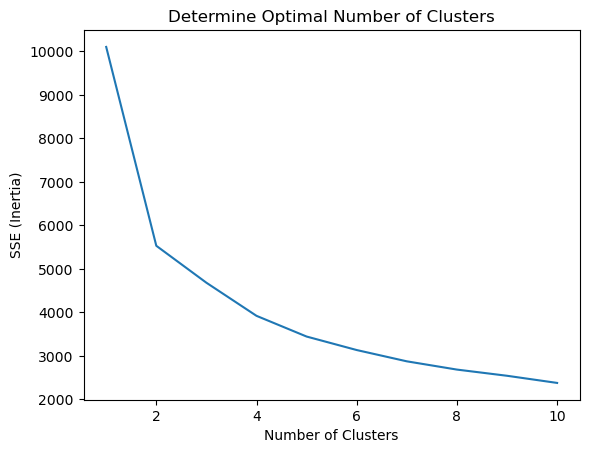

In [20]:
sse = []

# Loop through cluster numbers
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init explicitly
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), sse)
plt.title('Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.show()


In [23]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) 
df['Cluster'] = kmeans.fit_predict(df_scaled)
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)

Cluster
0    522
2    513
1    506
3    480
Name: count, dtype: int64


 # (Recency vs Total Spend)

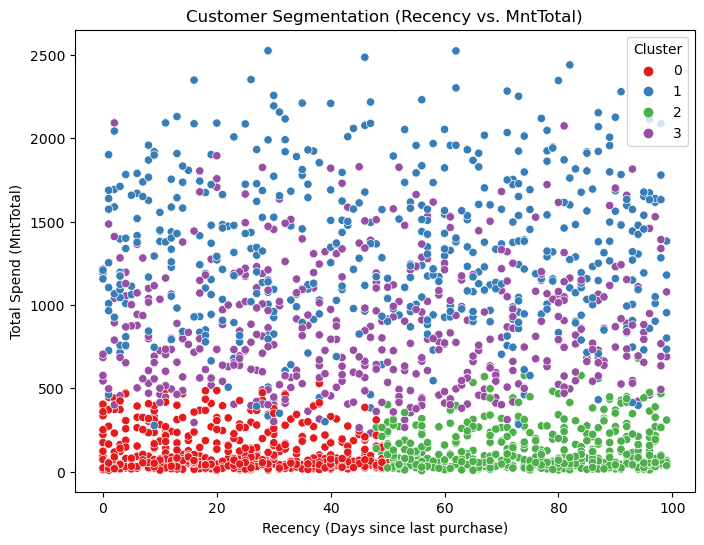

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Recency', y='MntTotal', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segmentation (Recency vs. MntTotal)')
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Total Spend (MntTotal)')
plt.legend(title='Cluster')
plt.show()

# (Income vs Total Spend)

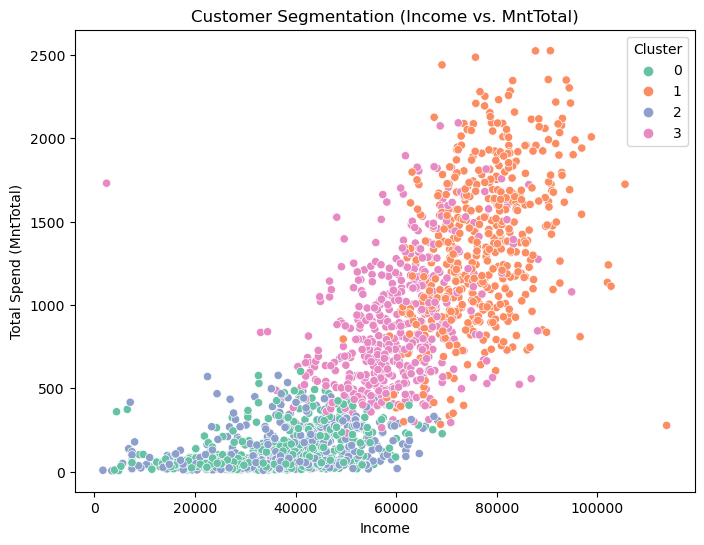

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', hue='Cluster', data=df, palette='Set2')
plt.title('Customer Segmentation (Income vs. MntTotal)')
plt.xlabel('Income')
plt.ylabel('Total Spend (MntTotal)')
plt.legend(title='Cluster')
plt.show()

# Average Total Spend by Cluster

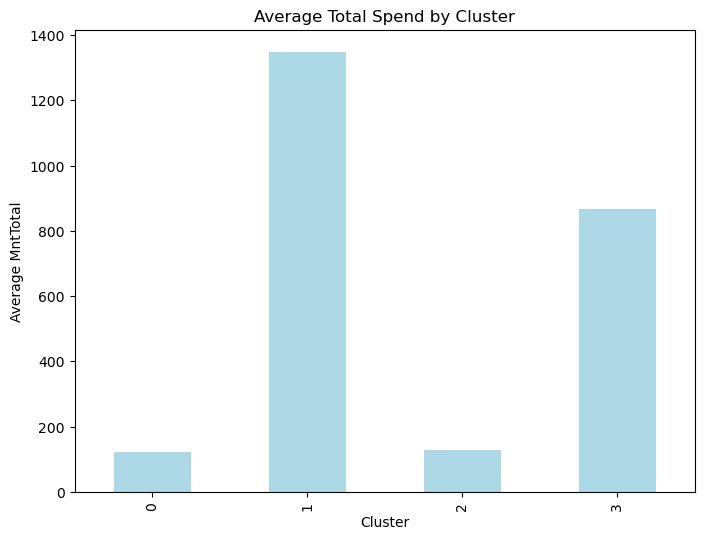

In [26]:
df.groupby('Cluster')['MntTotal'].mean().plot(kind='bar', color='lightblue', figsize=(8, 6))
plt.title('Average Total Spend by Cluster')
plt.ylabel('Average MntTotal')
plt.xlabel('Cluster')
plt.show()

# Income Distribution by Cluster

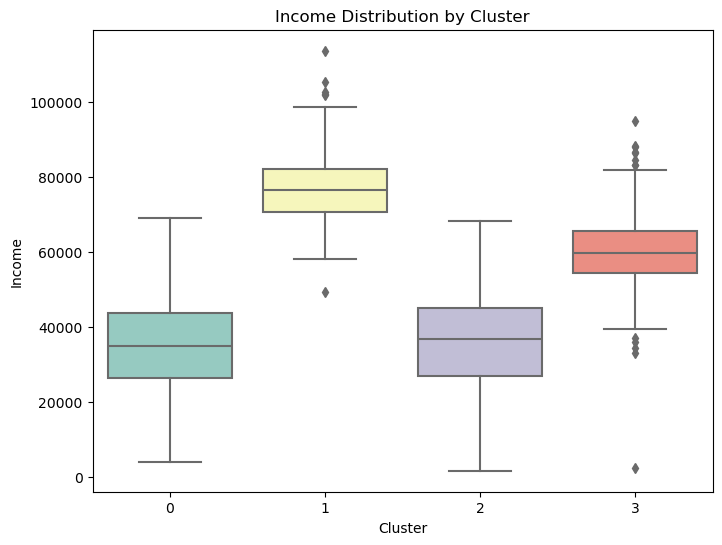

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=df, palette='Set3')
plt.title('Income Distribution by Cluster')
plt.ylabel('Income')
plt.xlabel('Cluster')
plt.show()

# Product Spending by Cluster

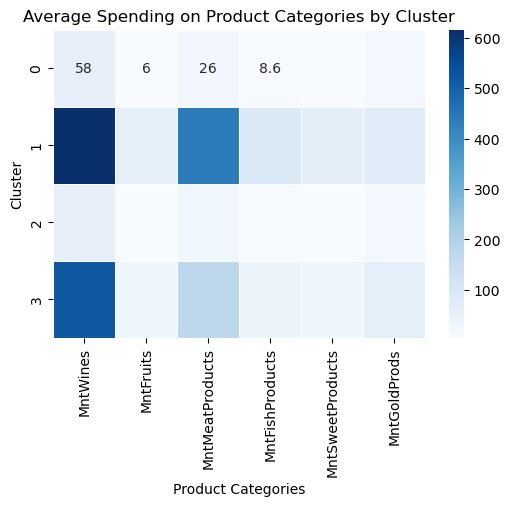

In [30]:
product_spend_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cluster_means = df.groupby('Cluster')[product_spend_columns].mean()
plt.figure(figsize=(6, 4))
sns.heatmap(cluster_means, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Average Spending on Product Categories by Cluster')
plt.xlabel('Product Categories')
plt.ylabel('Cluster')
plt.show()

# Cluster Profiles

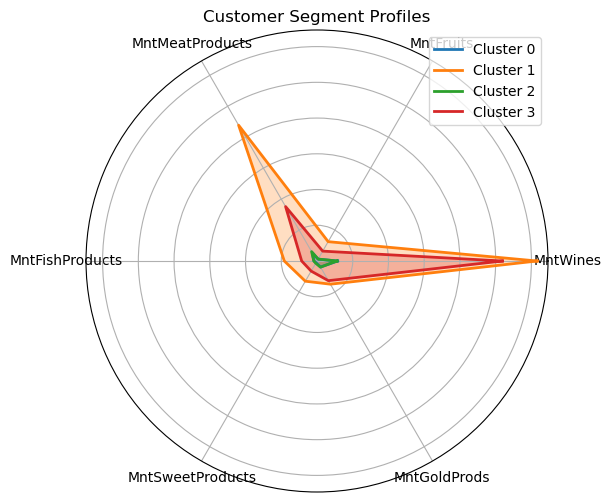

In [31]:
def plot_radar(cluster_means, features):
    num_vars = len(features)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    for i, row in cluster_means.iterrows():
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, label=f'Cluster {i}')
        ax.fill(angles, values, alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)
    
    plt.title('Customer Segment Profiles')
    plt.legend(loc='upper right')
    plt.show()
plot_radar(cluster_means, product_spend_columns)


 # Key Features by Cluster

D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

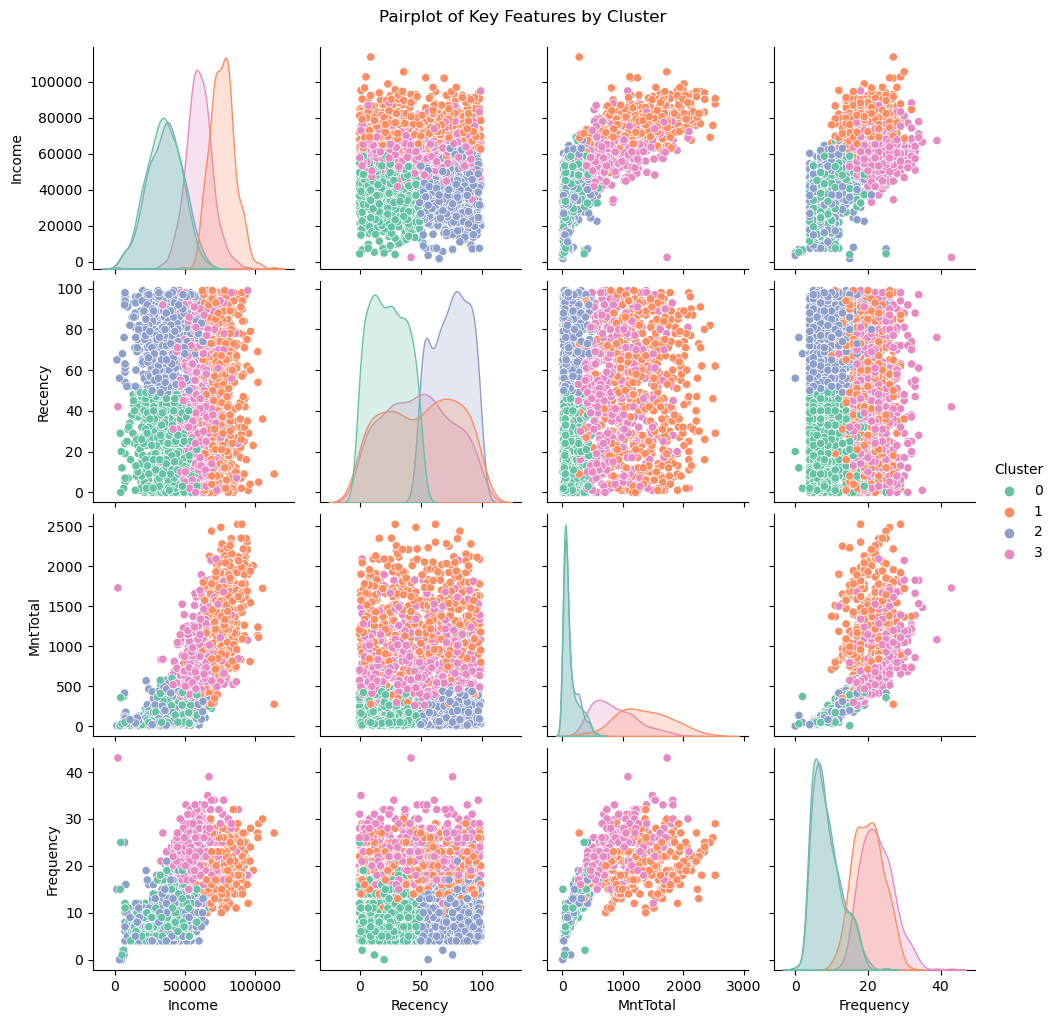

In [35]:
sns.pairplot(df[['Income', 'Recency', 'MntTotal', 'Frequency', 'Cluster']], hue='Cluster', palette='Set2', diag_kind='kde')
plt.suptitle('Pairplot of Key Features by Cluster', y=1.02)
plt.show()